In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from sklearn.utils import class_weight

import pandas as pd
import os
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import shutil

In [2]:
root_path = os.getcwd()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


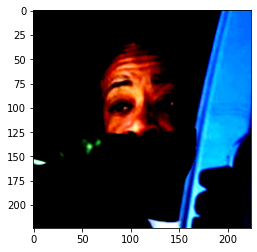

In [9]:
filename = root_path +"/LFW_Dataset/Masked_LFW_Dataset/Masked_LFW_Dataset/Al_Sharpton_0001.jpg"
input_image = Image.open(filename)

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

plt.imshow(torch.swapaxes(torch.swapaxes(input_tensor, 0, 2), 0, 1))
plt.show()

### Data Loading

In [162]:
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision.datasets import ImageFolder

In [163]:
dataset_name = "LFW_Dataset"
masked_root = os.path.join(root_path, dataset_name, "/Masked_LFW_Dataset/Masked_LFW_Dataset/")
unmasked_root = os.path.join(root_path, dataset_name, "/LFW_without_Mask/LFW_without_Mask")

In [164]:
batch_size = 1
img_ds = ImageFolder(root=os.path.join(root_path,dataset_name), transform=preprocess)
n = len(img_ds)

In [165]:
# unmasked, masked = 0, 1
unmasked, masked = [], []
for (path, label) in img_ds.imgs:
    if label == 0:
        unmasked.append(path)
    else:
        masked.append(path)

In [166]:
len(unmasked), len(masked)

(2115, 2002)

In [167]:
n_unmasked = int(len(unmasked) * .8)
n_masked = int(len(masked) * .8)

#### Saving the different sub-datasets

In [4]:
save_path = root_path + "/pytorch-CycleGAN-and-pix2pix/datasets/LFW_dataset"

### Training model on Kaggle Dataset

In [5]:
current_path = os.getcwd() 

In [6]:
current_path = os.getcwd() # would be the same path as a.py
code_path = "/pytorch-CycleGAN-and-pix2pix"
mydir_new = os.chdir(current_path + code_path)

In [ ]:
!python train.py --dataroot ./datasets/LFW_dataset --name mask2unmask_final2 --model cycle_gan --n_epochs 10

In [15]:
# Change model's name: net_G_A to net_G

# testA Unmasked to Masked
!python test.py --dataroot datasets/LFW_dataset/testA --name mask2unmask_final2 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/LFW_dataset/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

processing (0310)-th image... ['datasets/LFW_dataset/testA/Jacques_Chirac_0003.jpg']
processing (0315)-th image... ['datasets/LFW_dataset/testA/Jake_Gyllenhaal_0004.jpg']
processing (0320)-th image... ['datasets/LFW_dataset/testA/James_Wolfensohn_0001.jpg']
processing (0325)-th image... ['datasets/LFW_dataset/testA/Jason_Kidd_0004.jpg']
processing (0330)-th image... ['datasets/LFW_dataset/testA/Jean-David_Levitte_0004.jpg']
processing (0335)-th image... ['datasets/LFW_dataset/testA/Jean_Charest_0005.jpg']
processing (0340)-th image... ['datasets/LFW_dataset/testA/Jelena_Dokic_0002.jpg']
processing (0345)-th image... ['datasets/LFW_dataset/testA/Jennifer_Capriati_0003.jpg']
processing (0350)-th image... ['datasets/LFW_dataset/testA/Jeong_Se-hyun_0003.jpg']
processing (0355)-th image... ['datasets/LFW_dataset/testA/Jesse_Jackson_0005.jpg']
processing (0360)-th image... ['datasets/LFW_dataset/testA/Jimmy_Carter_0002.jpg']
processing (0365)-th image... ['datasets/LFW_dataset/testA/Joan_Lap

In [16]:
# Change model's name: net_G_B to net_G

# testB Masked to Unmasked
!python test.py --dataroot datasets/LFW_dataset/testB --name mask2unmask_final2 --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/LFW_dataset/testB    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

processing (0305)-th image... ['datasets/LFW_dataset/testB/James_Wolfensohn_0003.jpg']
processing (0310)-th image... ['datasets/LFW_dataset/testB/Javier_Solana_0004.jpg']
processing (0315)-th image... ['datasets/LFW_dataset/testB/Jean-David_Levitte_0005.jpg']
processing (0320)-th image... ['datasets/LFW_dataset/testB/Jean_Chretien_0002.jpg']
processing (0325)-th image... ['datasets/LFW_dataset/testB/Jennifer_Aniston_0003.jpg']
processing (0330)-th image... ['datasets/LFW_dataset/testB/Jennifer_Lopez_0001.jpg']
processing (0335)-th image... ['datasets/LFW_dataset/testB/Jesse_Jackson_0005.jpg']
processing (0340)-th image... ['datasets/LFW_dataset/testB/Jimmy_Carter_0003.jpg']
processing (0345)-th image... ['datasets/LFW_dataset/testB/Joe_Lieberman_0001.jpg']
processing (0350)-th image... ['datasets/LFW_dataset/testB/John_Allen_Muhammad_0003.jpg']
processing (0355)-th image... ['datasets/LFW_dataset/testB/John_Edwards_0004.jpg']
processing (0360)-th image... ['datasets/LFW_dataset/testB/J

----------------------------------------------------------------------------------------

### FFHQ Dataset

In [185]:
dataset_name = "/FFHQ_128_128"
masked_root = os.path.join(root_path, dataset_name, "FFHQ_Masked/CMFD_Extended")
unmasked_root = os.path.join(root_path, dataset_name, "FFHQ_Unmasked")

In [157]:
def prepare_subsets(dset_path, save_path, n_split = 0.8):
    batch_size = 1
    img_ds = ImageFolder(root=dset_path, transform=preprocess)
    n = len(img_ds)
    # unmasked, masked = 0, 1
    unmasked, masked = [], []
    for (path, label) in img_ds.imgs:
        if label == 0:
            unmasked.append(path)
        else:
            masked.append(path)
    
    n_unmasked = int(len(unmasked) * n_split)
    n_masked = int(len(masked) * n_split)
    
    counter_train = 0
    counter_test = 0
    for idx, path in enumerate(unmasked):
        if idx < n_unmasked:
            subset = "trainA"  #Unmasked
            counter_train += 1
        else:
            subset = "testA"  #Unmasked
            counter_test += 1
    
        splitted = path.split('/')
        target = os.path.join(save_path, subset, splitted[-1])
        shutil.copyfile(path, target)
    print("\t trainA: {}, testA: {}".format(counter_train, counter_test))
    
    counter_train = 0
    counter_test = 0
    for idx, path in enumerate(masked):
        if idx < n_masked:
            subset = "trainB"  #masked
            counter_train += 1
        else:
            subset = "testB"  #masked
            counter_test += 1
    
        splitted = path.split('/')
        target = os.path.join(save_path, subset, splitted[-1])
        shutil.copyfile(path, target)
    print("\t trainB: {}, testB: {}".format(counter_train, counter_test))

In [186]:
dname = root_path +"/" + dataset_name
save_path = root_path + "/pytorch-CycleGAN-and-pix2pix/datasets/FFHQ"
prepare_subsets(dname, n_split = 0.8)

	 trainA: 52188, testA: 13047
	 trainB: 56000, testB: 14000


In [189]:
52188 +  13047

65235

In [190]:
56000 + 14000

70000

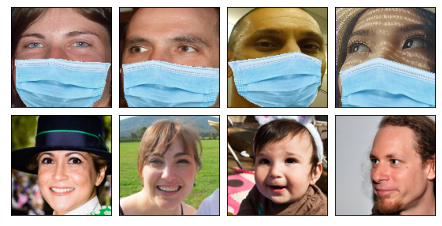

In [223]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

im1 = save_path + "/" + "trainA/29941_Mask.jpg"
im2 = save_path + "/" + "trainA/24850_Mask.jpg"
im11 = save_path + "/" + "trainA/29971_Mask.jpg"
im22 = save_path + "/" + "trainA/30850_Mask.jpg"

im3 = save_path + "/" + "trainB/35357.png"
im4 = save_path + "/" + "trainB/14705.png"
im33 = save_path + "/" + "trainB/11746.png"
im44 = save_path + "/" + "trainB/53017.png"

im1, im2, im3, im4 = plt.imread(im1), plt.imread(im2), plt.imread(im3), plt.imread(im4)
im11, im22, im33, im44 = plt.imread(im11), plt.imread(im22), plt.imread(im33), plt.imread(im44)

fig = plt.figure(figsize=(35, 24))
grid = ImageGrid(fig, 241,  # similar to subplot(111)
                 nrows_ncols=(2, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [im1, im2, im11, im22, im3, im4, im33, im44]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
plt.title("Samples from FFHQ dataset")
plt.show()